# Exercise 12.1

Working with your team, answer the following questions:

* how many reviews are there with missing ratings?
* how many unique reviewers are there? How many unique movies?
* how many reviews did each reviewer write on average?
* how many reviews did each movie receive on average?
* how many reviews are there with the score of 5? With the score of 1?
* what is the distribution of mean scores of the movies? Use a histogram (df.hist) with 20 bin
* what is the distribution of mean scores of the reviewers?

1.: There are no reviews with missing ratings.
2.: There are 671 unique reviewers and 9066 unique movies.
3.: Each user gave on average 149.04 reviews.
4.: Each movie got 11.03 reviews on average.
5.: There are 15095 5-score and 3326 1-score reviews
6.: Distribution of mean scores over movies.
7.: Distribution of mean scores over reviewer.


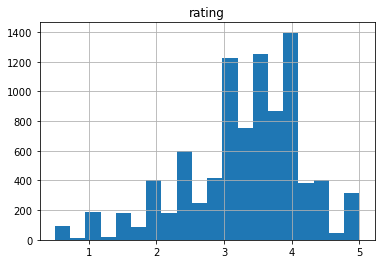

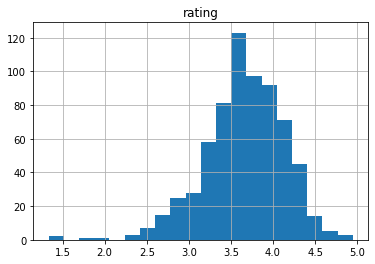

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv("movie-lens-ratings.csv") #read the csv-file into a dataframe


counted_ratings = df["rating"].value_counts(dropna=False) #count numbers of all unique values including missing values
counted_ratings = counted_ratings.sort_index(ascending=True) #sort the series ascending by the index (rating)
#print(type(counted_ratings), "\n", counted_ratings) #print out the counted ratings
if not None in counted_ratings.index: #if no index with None exists, then not a single none/NaN has been in the ratings column
    print("1.: There are no reviews with missing ratings.")

num_reviewers = df["userId"].unique() #returns np-array with all unique user Id's
num_movies = df["movieId"].unique() #returns np-array with all unique movie Id's
print(f"2.: There are {num_reviewers.size} unique reviewers and {num_movies.size} unique movies.") #prints out number of array elements

average_reviews = df["userId"].value_counts().mean() #calculates the mean of the number of instances of one specific userID
average_reviews = format(average_reviews, ".2f") #rounds the calculated mean to a 2digit decimal number
print(f"3.: Each user gave on average {average_reviews} reviews.")

average_reviewed = df["movieId"].value_counts().mean() #calculates the mean of the number of instances of one specific movieID
average_reviewed = format(average_reviewed, ".2f") #rounds the calculated mean to a 2digit decimal number
print(f"4.: Each movie got {average_reviewed} reviews on average.")

print(f"5.: There are {counted_ratings.loc[5.0]} 5-score and {counted_ratings.loc[1.0]} 1-score reviews")

print("6.: Distribution of mean scores over movies.")
distro_movie = df.pivot_table(index="movieId", values="rating") #pivot_table() groups by user Id and calculates the mean of rating
histo_movie = distro_movie.hist(bins=20)

print("7.: Distribution of mean scores over reviewer.")
distro_reviewer = df.pivot_table(index="userId", values="rating") #pivot_table() groups by movie Id and calculates the mean of rating
histo_reviewer = distro_reviewer.hist(bins=20)

